# Data-Driven Insights

## Análise Comparativa do Desempenho Escolar: Matemática x Português

### Autoria: Heloisa de Lima Lafaiete


Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carregando o dataset

In [ ]:
# URL do dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip "

# Baixar e extrair o arquivo zip
!wget {url} -O student.zip
!unzip -o student.zip
# O que tiver ! é Linux

--2025-07-24 00:14:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘student.zip’

student.zip             [ <=>                ]  20.00K  --.-KB/s    in 0.05s   

2025-07-24 00:14:34 (413 KB/s) - ‘student.zip’ saved [20478]

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


Execute essa célula para fazer upload direto no Google Colab, se necessário:
* from google.colab import files
* files.upload()

----
**Observações Fernando:**

Amostra das primeiras linhas do arquivo de dados (.head), é possível mostrar as últimas através de .tail também.

O porém aqui é a utilização da função duas vezes na mesma célula, isto impede que ambas as saídas apareçam. Uma opção é utilizar um por célula ou utilizar a função display



----

In [ ]:
# Carregar os dados em DataFrames
df_mat = pd.read_csv('student-mat.csv', sep=';')

In [ ]:
df_por = pd.read_csv('student-por.csv', sep=';')

In [ ]:
# Visualizar as primeiras linhas
print("Dados de Matemática:")
df_mat.head(10)

Dados de Matemática:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [ ]:
print("\nDados de Português:")
df_por.head(10)


Dados de Português:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13




O método .shape mostra (número de linhas, número de colunas) dos dados



In [ ]:
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')
print('Shape MAT:', df_mat.shape)
print('Shape POR:', df_por.shape)

Shape MAT: (395, 33)
Shape POR: (649, 33)


Exploração inicial

In [ ]:
print('\nMATH COLUMNS:\n', df_mat.columns)
display(df_mat.head())
print('\nPORTUGUESE COLUMNS:\n', df_por.columns)
display(df_por.head())


MATH COLUMNS:
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



PORTUGUESE COLUMNS:
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Estruturas básicas: listas, dicionários, tuplas
python



Aqui é utilizada a função LIST, SET e UNION para pegar as informações das escolas únicas presentes para ambos datasets.

1. É feito um *set* (não tem repetições, ex: (1,2,3) e não (1,1,2,2,3,3)) das escolas de ambos conjuntos de dados.
2. Ambas os *sets* são unidos através da função UNION. Está função junta dois *sets* e retorna outro *set*, portanto, não devem ter repetições.
3. O objeto *set* retornado pela função UNION é então transformado em uma lista através da função LIST.



In [ ]:
# Lista: todas as escolas presentes nos dois datasets
schools = list(set(df_mat['school']).union(set(df_por['school'])))
print('Escolas:', schools)

Escolas: ['GP', 'MS']


Aqui é pego o número de linhas de cada conjunto de dados, já que cada linha representa um aluno. Outra forma de se obter essa informação é através da função .shape:

In [ ]:
# Dicionário: número de alunos em cada curso
alunos_curso = {'matematica': len(df_mat), 'portugues': len(df_por)}
print(alunos_curso)

{'matematica': 395, 'portugues': 649}


Outra forma de se obter essa informação é através da função .shape:

In [ ]:
df_mat.shape

(395, 33)

In [ ]:
df_por.shape

(649, 33)

In [ ]:
# Tupla: (nome da base, nota máxima na final G3)
notas_max = [('matematica', df_mat['G3'].max()), ('portugues', df_por['G3'].max())]
print('Notas finais máxima:', notas_max)

Notas finais máxima: [('matematica', 20), ('portugues', 19)]


Operações condicionais e loops

---
1. Cria lista de 2 tuplas que possuem o padrão: (nome da matéria, dataframe)
2. Passa por um loop `for` para cada item da lista anterior.
3. Cria variável para guardar o número de alunos com nota maior que 18 (alto)
4. Passa por um loop `for` para cada nota G3 de cada matéria
5. Adiciona a variável alto 1 unidade para cada aluno com nota $>= 18$
6. Imprime o nome da matéria e o total de alunos que tiveram nota >=18

In [ ]:
# Contar quantos alunos atingiram nota >= 18 em cada dataset
for nome, df in [('matematica', df_mat), ('portugues', df_por)]:
    alto = 0
    for nota in df['G3']:
        if nota >= 18:
            alto += 1
    print(f'Alunos com G3 >= 18 em {nome}:', alto)

Alunos com G3 >= 18 em matematica: 18
Alunos com G3 >= 18 em portugues: 17


Sugestão:

In [ ]:
notas_mat = df_mat['G3']
notas_por = df_por['G3']

mais_18_mat = 0
mais_18_por = 0

for nota in notas_mat:
  if nota >= 18:
    mais_18_mat += 1

print(f'Tem {mais_18_mat} alunos com a nota maior ou igual a 18 em matemática')


for nota in notas_por:
  if nota >= 18:
    mais_18_por += 1

print(f'Tem {mais_18_por} alunos com a nota maior ou igual a 18 em português')

Tem 18 alunos com a nota maior ou igual a 18 em matemática
Tem 17 alunos com a nota maior ou igual a 18 em português


Manipulação de colunas com pandas

---
Função .mean calcula a média, porém ao usar o axis=1 ele calcula a média na linha e não na coluna que seria axis=0

In [ ]:
# Adicionando coluna com média das notas
df_mat['media'] = df_mat[['G1','G2','G3']].mean(axis=1)
df_por['media'] = df_por[['G1','G2','G3']].mean(axis=1)

Operações com arrays NumPy

---
Função std (standard deviation ou desvio padrão) do numpy é utilizado na lista de notas finais G3.

Observação: Não necessariamente precisa utilizar a função np.array

In [ ]:
# Desvios padrão das notas finais
std_mat = np.std(np.array(df_mat['G3']))
std_por = np.std(np.array(df_por['G3']))
print(f'Desvio padrão MAT: {std_mat:.2f} | POR: {std_por:.2f}')

Desvio padrão MAT: 4.58 | POR: 3.23


 Filtragem, agrupamento e resumo

---
O filtro de um dataframe é feito através de condicionais dentro de []

No caso devem ser utilizadas as colunas corretas, studytime e G3.

In [ ]:
# Filtra alunos que estudam pouco (<2) e têm nota baixa (<=10)
filtro_mat = df_mat[(df_mat['studytime'] < 2) & (df_mat['G3'] <= 10)]
filtro_por = df_por[(df_por['studytime'] < 2) & (df_por['G3'] <= 10)]
print('MAT alunos pouco estudo/nota baixa:', len(filtro_mat))
print('POR alunos pouco estudo/nota baixa:', len(filtro_por))

MAT alunos pouco estudo/nota baixa: 54
POR alunos pouco estudo/nota baixa: 91


---
O agrupamento deve ser feito pela função groupby que cria um dataframe que junta os dados pela coluna escolhida. Depois de agrupado, é possível utilizar funções que resumem os dados, tais como: mean, std, count, max e min.

In [ ]:
# Agrupamento: média nota final por sexo
agrup_mat = df_mat.groupby('sex')['G3'].mean()
agrup_por = df_por.groupby('sex')['G3'].mean()
print('Média G3 MAT por sexo:\n', agrup_mat)
print('Média G3 POR por sexo:\n', agrup_por)

Média G3 MAT por sexo:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64
Média G3 POR por sexo:
 sex
F    12.253264
M    11.406015
Name: G3, dtype: float64


Visualizações

Evolução das médias das três avaliações

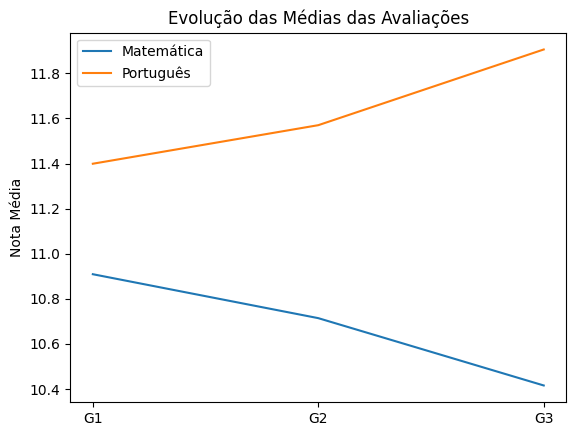

In [ ]:
plt.plot(['G1','G2','G3'], [df_mat['G1'].mean(), df_mat['G2'].mean(), df_mat['G3'].mean()], label='Matemática')
plt.plot(['G1','G2','G3'], [df_por['G1'].mean(), df_por['G2'].mean(), df_por['G3'].mean()], label='Português')
plt.title('Evolução das Médias das Avaliações')
plt.ylabel('Nota Média')
plt.legend()
plt.show()

Notas finais por sexo

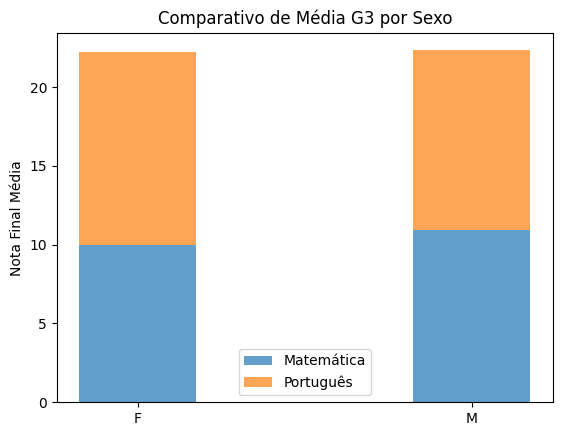

In [ ]:
width = 0.35
labels = agrup_mat.index
fig, ax = plt.subplots()
ax.bar(labels, agrup_mat.values, width, label='Matemática', alpha=0.7)
ax.bar(labels, agrup_por.values, width, bottom=agrup_mat.values, label='Português', alpha=0.7)
plt.title('Comparativo de Média G3 por Sexo')
plt.ylabel('Nota Final Média')
plt.legend()
plt.show()

Dispersão: horas de estudo x nota final

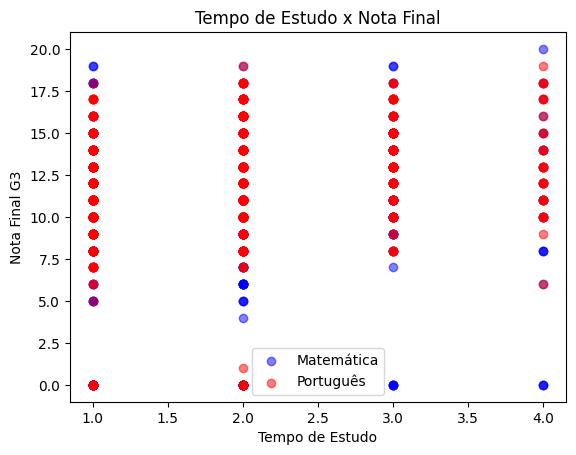

In [ ]:
plt.scatter(df_mat['studytime'], df_mat['G3'], c='blue', alpha=0.5, label='Matemática')
plt.scatter(df_por['studytime'], df_por['G3'], c='red', alpha=0.5, label='Português')
plt.xlabel('Tempo de Estudo')
plt.ylabel('Nota Final G3')
plt.title('Tempo de Estudo x Nota Final')
plt.legend()
plt.show()

## 10. Insights dos Dados

- Embora os padrões de desempenho sejam semelhantes entre Matemática e Português, a dispersão das notas em Matemática é levemente maior.
- Estudantes do sexo feminino apresentam médias um pouco superiores em ambos os cursos.
- O gráfico de dispersão sugere que investir mais tempo de estudo aumenta a chance de notas elevadas, mas não garante, pois notas altas também aparecem com pouco estudo.
- A média das notas cai da G1 para G3, mostrando possível aumento de exigência ou dificuldades de continuidade.

#Relatório Final
##Principais Aprendizados

* Estruturas Python: Utilizamos listas, dicionários, tuplas, condicionais e loops para análises pontuais dos dados.
* Pandas & NumPy: Manipulamos colunas, summary statistics, agrupamentos, filtragens e visualizações.
* Comparação: Alunos de Português e Matemática apresentam padrões semelhantes nos principais indicadores, porém a variabilidade em Matemática é superior.
* Visualizações: Gráficos deixaram claras as relações entre tempo de estudo, sexo e desempenho.

Próximos passos

* Como fatores socioeconômicos e familiares impactam diferença entre cursos?
* Levar a análise para predição de desempenho usando machine learning.
* Explorar o impacto de faltas escolares nas notas finais.

#Relatório Final

## Principais Aprendizados

- Praticamos manipulações de listas, tuplas, dicionários e loops com dados reais.
- Usamos o pandas para criar colunas, filtrar, agrupar e gerar resumos estatísticos.
- Exploramos operações NumPy e visualizações com matplotlib.
- Realizamos uma análise comparativa entre duas áreas do conhecimento.
- Descobrimos que sexo e tempo de estudo não explicam totalmente o desempenho – há muitos fatores adicionais a investigar.

## Possíveis Próximos Passos

- Explorar correlação de outras variáveis: hábitos familiares, faltas, trabalho, etc.
- Avaliar impacto socioeconômico e nível de escolaridade dos pais.
- Tentar regressão para prever nota final (G3) baseada em múltiplas variáveis.
